In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# this function is the numerator of the target distribution
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [3]:
# normal PDF
def g(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi) * sigma)) * np.exp(-0.5*((x-mu)/sigma)**2)

# Draw Target Distribution

In [4]:
NORM_CONST = 7.16556

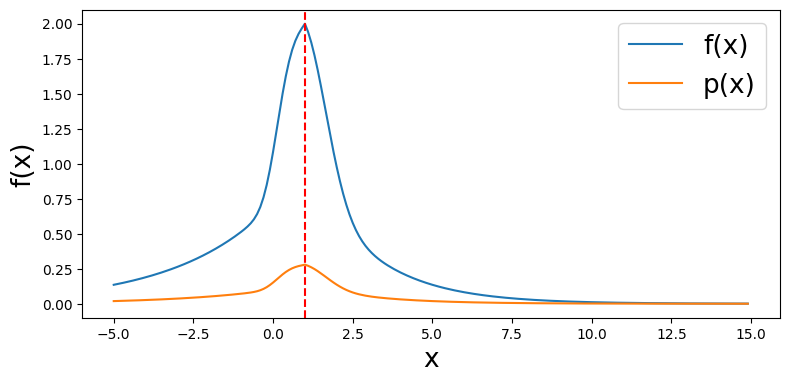

In [5]:
x_vals = np.arange(-5,15, .1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(9,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=19)
plt.xlabel('x', fontsize=19)
plt.ylabel('f(x)', fontsize=19)
plt.axvline(1, color='r', linestyle='--')
plt.show()

In [7]:
TRUE_EXPECTATION = 1.94709 / NORM_CONST
print(TRUE_EXPECTATION)

0.2717289367474419


# Case 1: Accept-Reject with N(0, 3) Candidate

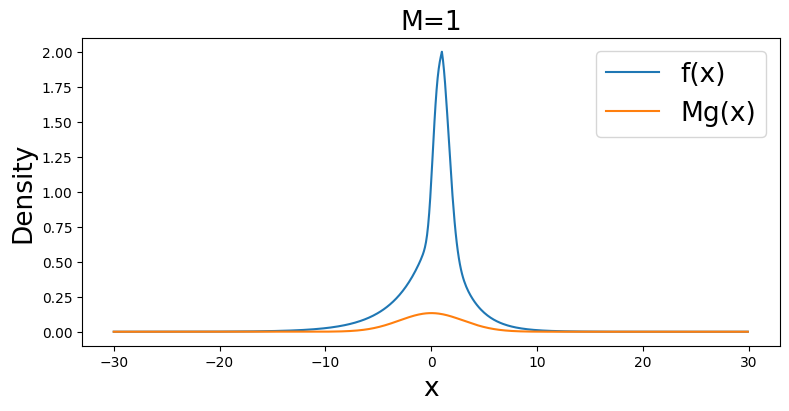

In [8]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 1

plt.figure(figsize=(9,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.legend(['f(x)', 'Mg(x)'], fontsize=19)

plt.title("M=%s" %M, fontsize=19)
plt.show()

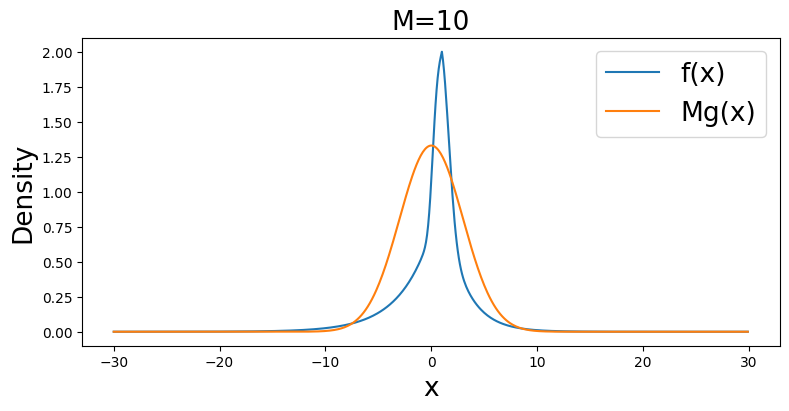

In [11]:
M = 10

plt.figure(figsize=(9,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.legend(['f(x)', 'Mg(x)'], fontsize=19)

plt.title("M=%s" %M, fontsize=19)
plt.show()

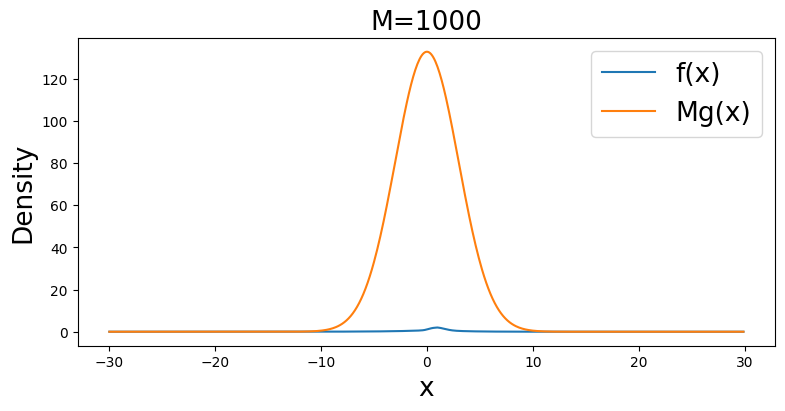

In [12]:
M = 1000

plt.figure(figsize=(9,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.legend(['f(x)', 'Mg(x)'], fontsize=19)

plt.title("M=%s" %M, fontsize=19)
plt.show()

(0.0, 0.05)

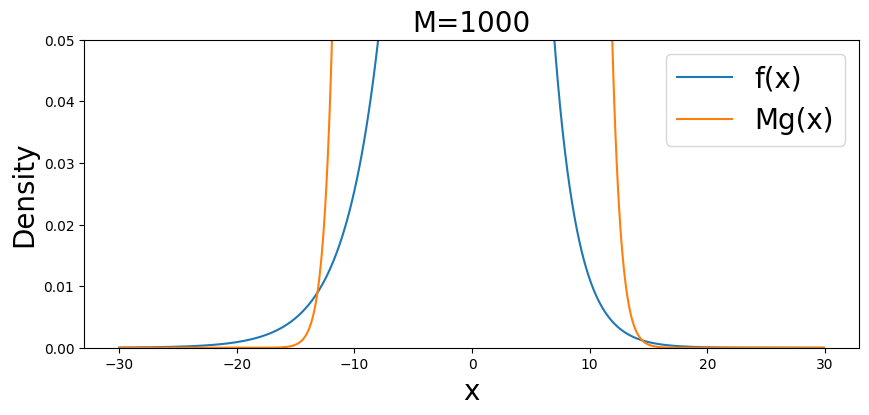

In [13]:
M = 1000

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

plt.ylim(0,.05)

In [14]:
# collect all accepted samples here
samples = []

# try this many candidates
N = 1000000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(0, 3)

    # calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0, 3))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [15]:
print(("Num Samples Collected: %s" %len(samples)))

Num Samples Collected: 6829


In [16]:
print("Efficiency: %s" %round(len(samples) / N, 3))

Efficiency: 0.007


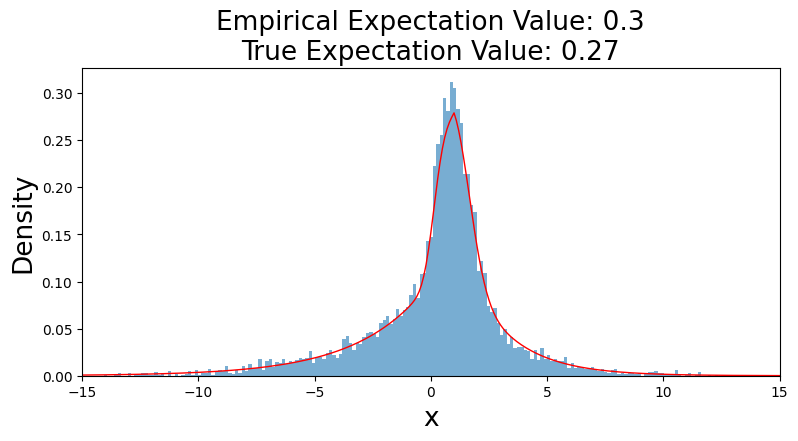

In [20]:
plt.figure(figsize=(9,4))
plt.hist(samples, bins=200, density=True, alpha=.6)
plt.xlabel('x', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=1, color='r')
plt.xlim(-15, 15)

plt.title("Empirical Expectation Value: %s\nTrue Expectation Value: %s"
          %(round(np.mean(samples),2), round(TRUE_EXPECTATION, 2)), fontsize=19)

plt.show()

# Case 2: Accept-Reject with N(1, 4) Candidate

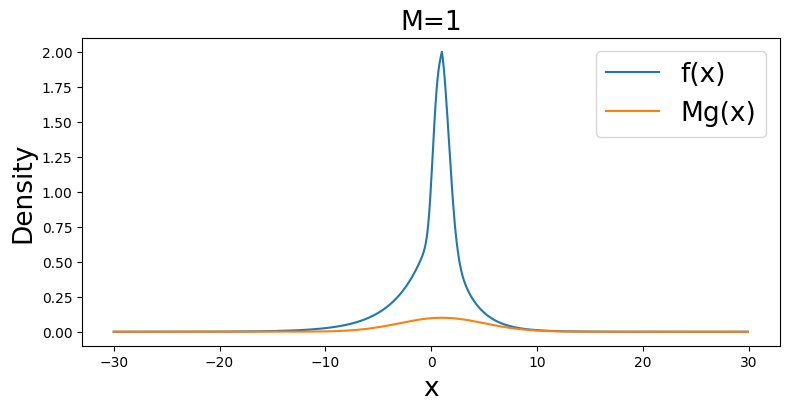

In [21]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)
M = 1

plt.figure(figsize=(9,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.legend(['f(x)', 'Mg(x)'], fontsize=19)

plt.title("M=%s" %M, fontsize=19)

plt.show()

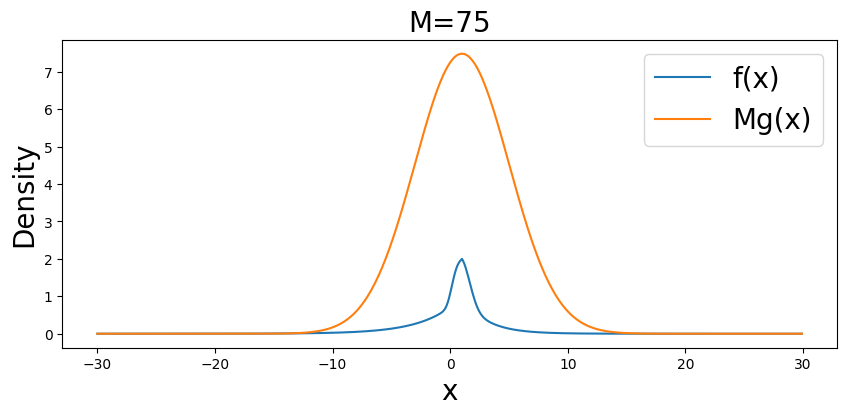

In [23]:
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20);

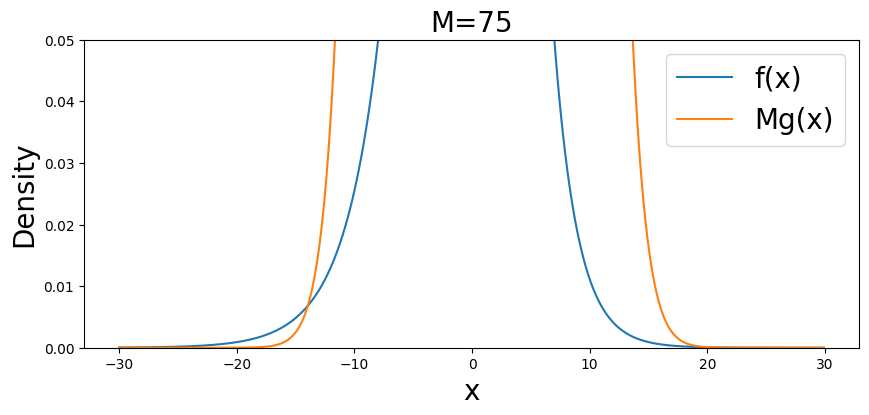

In [24]:
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)
plt.ylim(0, 0.05);

In [25]:
samples = []
N = 1000000
for _ in range(N):
    # get a candidate
    candidate = np.random.normal(1, 4)

    # calculate probability of accepting this sample
    prob_accept = f(candidate) / (M*g(candidate, 1, 4))

    # accept sample with this probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [26]:
print("Num Samples Collected: %s" %len(samples))

Num Samples Collected: 89856


In [27]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.09


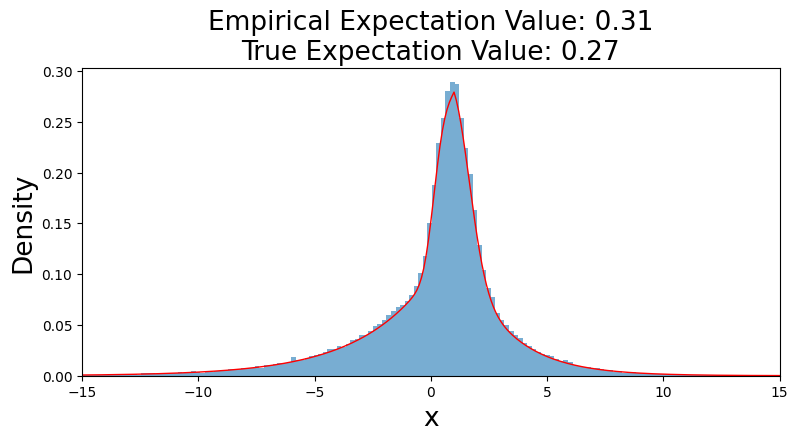

In [29]:
plt.figure(figsize=(9,4))
plt.hist(samples, bins=200, density=True, alpha=.6)
plt.xlabel('x', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=1, color='r')
plt.xlim(-15, 15)

plt.title('Empirical Expectation Value: %s\nTrue Expectation Value: %s'
          %(round(np.mean(samples), 2), round(np.mean(TRUE_EXPECTATION), 2)), fontsize=19)

plt.show()

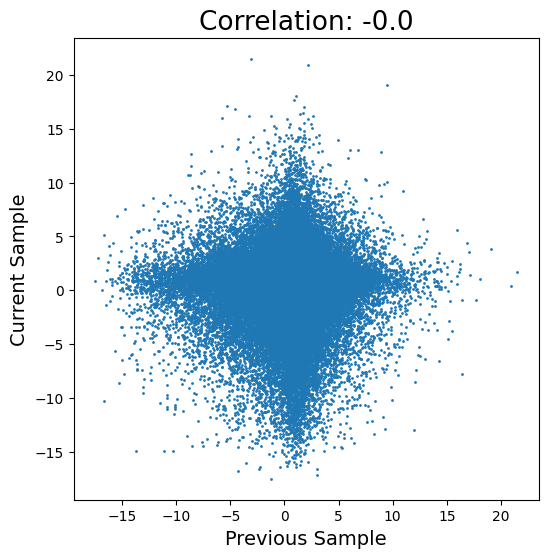

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=14)
plt.ylabel('Current Sample', fontsize=14)
corr = round(pearsonr(samples[:-1], samples[1:])[0],2)
plt.title('Correlation: %s' %corr, fontsize=19)

plt.show()

# Case 3: Metropolis Algorithm with N(x_prev, 4) Candidate

In [32]:
samples = [1]
num_accept = 0

for _ in range(N):
    # sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)

    # calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))

    # accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1

    # otherwise report current sample again
    else:
        samples.append(samples[-1])

In [33]:
burn_in = 1000
retained_samples = samples[burn_in+1:]

print("Num Samples Collected: %s" %len(retained_samples))

Num Samples Collected: 999000


In [34]:
print("Efficiency: %s" %round(len(retained_samples) / N, 3))

Efficiency: 0.999


In [35]:
print("Fraction Acceptances: %s" %(num_accept / N))

Fraction Acceptances: 0.486124


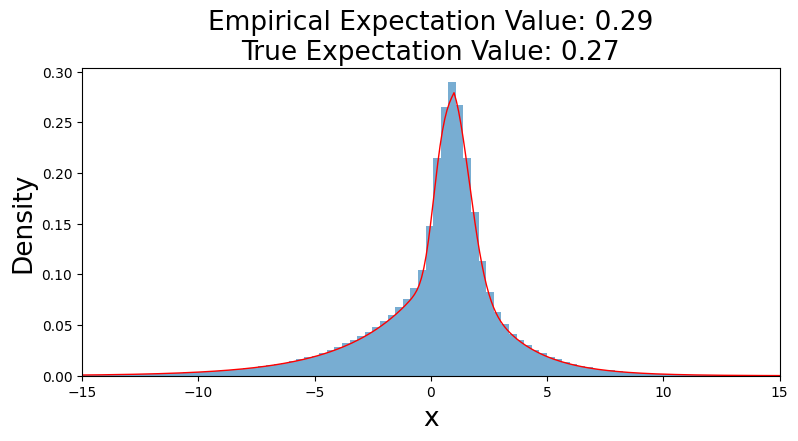

In [37]:
plt.figure(figsize=(9,4))
plt.hist(retained_samples, bins=200, density=True, alpha=.6)
plt.xlabel('x',fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=1, color='r')
plt.xlim(-15, 15)

plt.title("Empirical Expectation Value: %s\nTrue Expectation Value: %s"
          %(round(np.mean(retained_samples), 2), round(np.mean(TRUE_EXPECTATION), 2)), fontsize=19)

plt.show()

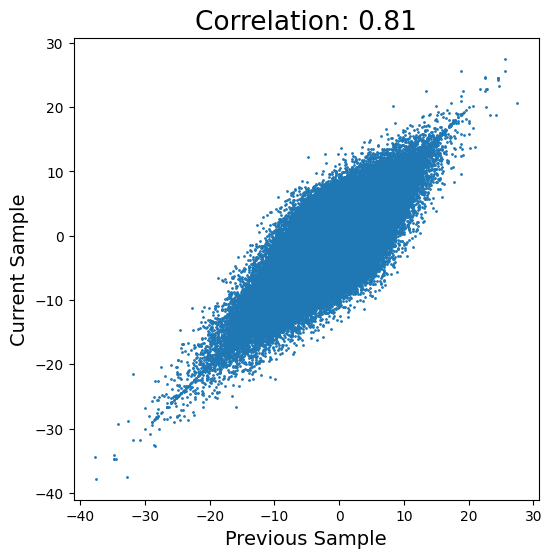

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=14)
plt.ylabel('Current Sample', fontsize=14)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s' %corr, fontsize=19)

plt.show()